In [11]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [12]:

from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# MaxPooling layer 1
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# MaxPooling layer 2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(units=128, activation='relu'))

# Dropout to reduce overfitting
model.add(layers.Dropout(rate=0.5))

# Output layer
model.add(layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Epoch 1/20


1563/1563 [==============================] - 29s 16ms/step - loss: 1.6506 - accuracy: 0.3952 - val_loss: 1.2801 - val_accuracy: 0.5455
Epoch 2/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3228 - accuracy: 0.5243 - val_loss: 1.1217 - val_accuracy: 0.6079
Epoch 3/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1990 - accuracy: 0.5758 - val_loss: 1.0562 - val_accuracy: 0.6302
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1083 - accuracy: 0.6093 - val_loss: 0.9931 - val_accuracy: 0.6473
Epoch 5/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0396 - accuracy: 0.6361 - val_loss: 0.9366 - val_accuracy: 0.6677
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9808 - accuracy: 0.6551 - val_loss: 0.9290 - val_accuracy: 0.6749
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9388 - accuracy: 0.6692 - val_loss: 0.8891

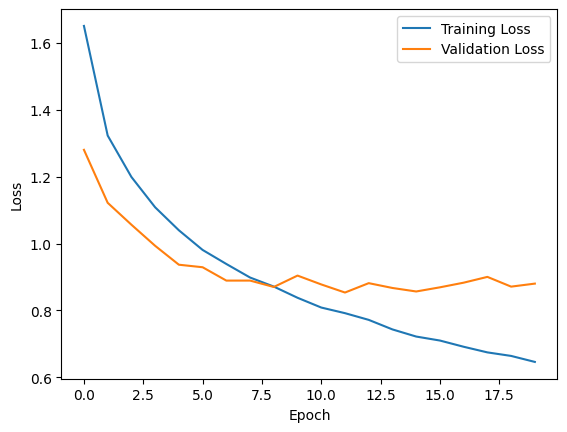

In [14]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Assuming you have already defined and compiled your model

# Define the optimizer with a suitable learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Replace 0.001 with your preferred learning rate

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Assuming you have already trained your model and loaded the testing dataset

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Make predictions on the testing dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Print results
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


313/313 - 2s - loss: 0.8801 - accuracy: 0.7124 - 2s/epoch - 6ms/step
313/313 [==============================] - 2s 6ms/step
Test Accuracy: 71.24%
Confusion Matrix:
[[798   8  40  21  11   1   8   7  70  36]
 [ 19 807   7   9   5   2  10   6  28 107]
 [ 74   1 580  45 124  62  49  32  15  18]
 [ 30   5  73 497  86 145  64  53  16  31]
 [ 25   3  74  43 698  31  32  77  13   4]
 [ 24   3  66 170  53 593  14  57   7  13]
 [  8   2  51  75  79  16 732  10  15  12]
 [ 26   2  42  22  60  46   6 770   3  23]
 [ 73  26  14   9   6   6   4   4 835  23]
 [ 40  70   9  15   2   4   5   7  34 814]]
Precision: 0.7120
Recall: 0.7124
